In [136]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

def Graph(df, Timedf, Oy, color='blue', Single=True):
    plt.scatter(Timedf, df[Oy], s=2, color=color)
    plt.xticks(rotation=90)
    plt.xlabel('Дата и время замера')
    plt.ylabel(Oy)
    if Single:
        plt.show()

PrimaryData = pd.read_csv('data.csv', sep=',', decimal='.', parse_dates=['44'])
PrimaryData

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,87.12,8.19,0.00,27.34,139.79,6.65,929.59,29.55,28.99,161.23,...,0.23,100.78,23.25,14.77,18.21,44.98,53254.14,0.0,89.6,2022-01-11 10:21:57
1,72.52,0.08,22.08,29.36,124.89,6.22,777.09,31.96,28.99,156.26,...,0.21,75.12,25.23,14.76,18.16,46.54,54447.47,0.0,76.2,2022-01-13 10:49:01
2,86.37,1.30,0.58,27.72,134.90,6.08,819.88,30.14,29.01,161.07,...,0.82,99.03,23.59,14.76,18.56,47.12,53350.95,0.0,88.8,2022-01-18 12:08:29
3,87.35,0.62,0.74,26.98,133.47,6.45,860.99,29.41,28.99,161.09,...,0.70,96.35,22.97,14.76,18.37,45.29,53428.56,0.0,78.1,2022-01-20 10:30:25
4,92.84,0.00,3.54,30.93,125.02,6.96,869.90,33.31,28.93,159.14,...,0.25,91.07,26.39,14.76,18.04,47.29,54383.78,0.0,82.7,2022-01-25 12:00:53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,103.29,0.00,1.07,36.18,145.32,6.47,939.91,38.35,29.00,167.00,...,0.62,108.94,25.52,18.95,14.75,50.78,50995.08,0.0,88.7,2024-01-04 10:18:36
101,99.05,0.00,0.00,35.27,136.64,6.37,869.96,37.07,29.00,165.34,...,0.27,99.29,25.50,18.59,14.74,48.65,51539.55,0.0,84.1,2024-01-11 10:18:36
102,101.64,0.00,1.38,36.39,139.26,6.32,880.00,38.45,29.00,165.27,...,0.29,101.06,25.73,18.64,14.74,49.41,51661.50,0.0,85.3,2024-01-18 10:54:41
103,122.73,0.00,0.00,31.86,169.95,5.12,870.14,33.46,29.23,169.28,...,0.93,124.49,24.15,19.28,14.74,50.85,50586.76,0.0,105.7,2024-01-25 11:04:58


In [3]:
#Выделение целевого, временного векторов и матрицы признаков
TimeName = '44'
TimeVector = PrimaryData[[TimeName]]
TimeVector.head(5)

,44
0,2022-01-11 10:21:57
1,2022-01-13 10:49:01
2,2022-01-18 12:08:29
3,2022-01-20 10:30:25
4,2022-01-25 12:00:53


In [4]:
TargetName = '0'
TargetVector = PrimaryData[[TargetName]]
TargetVector.head(5)

,0
0,87.12
1,72.52
2,86.37
3,87.35
4,92.84


In [5]:
FeaturesMatrix = PrimaryData.drop([TimeName, TargetName], axis=1)
FeaturesMatrix.head(5)

,1,2,3,4,5,6,7,8,9,10,...,34,35,36,37,38,39,40,41,42,43
0,8.19,0.00,27.34,139.79,6.65,929.59,29.55,28.99,161.23,177.41,...,3.40,0.23,100.78,23.25,14.77,18.21,44.98,53254.14,0.0,89.6
1,0.08,22.08,29.36,124.89,6.22,777.09,31.96,28.99,156.26,171.22,...,3.69,0.21,75.12,25.23,14.76,18.16,46.54,54447.47,0.0,76.2
2,1.30,0.58,27.72,134.90,6.08,819.88,30.14,29.01,161.07,175.13,...,3.69,0.82,99.03,23.59,14.76,18.56,47.12,53350.95,0.0,88.8
3,0.62,0.74,26.98,133.47,6.45,860.99,29.41,28.99,161.09,175.95,...,3.70,0.70,96.35,22.97,14.76,18.37,45.29,53428.56,0.0,78.1
4,0.00,3.54,30.93,125.02,6.96,869.90,33.31,28.93,159.14,176.78,...,3.70,0.25,91.07,26.39,14.76,18.04,47.29,54383.78,0.0,82.7


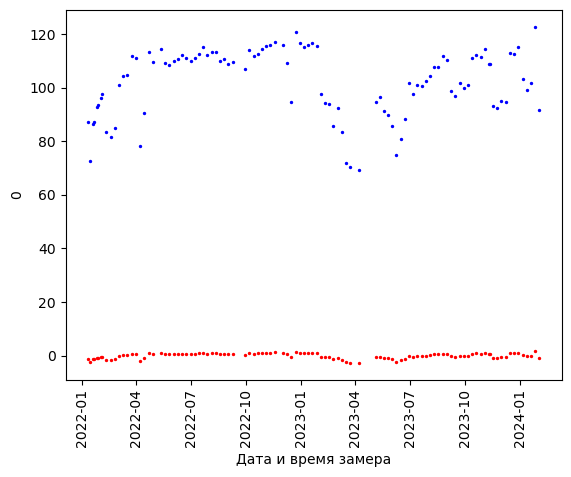

In [137]:
#Нормализация данных
TargetVectorNormalize = pd.DataFrame(preprocessing.StandardScaler().fit_transform(TargetVector), columns=TargetVector.columns)


Graph(TargetVector, TimeVector, '0', Single=False)
Graph(TargetVectorNormalize, TimeVector, '0', color='red')

In [7]:
FeaturesMatrixNormalize = pd.DataFrame(preprocessing.StandardScaler().fit_transform(FeaturesMatrix), columns=FeaturesMatrix.columns)
FeaturesMatrixNormalize.head(5)

,1,2,3,4,5,6,7,8,9,10,...,34,35,36,37,38,39,40,41,42,43
0,10.032978,-0.494442,-2.975866,-0.338080,1.102889,0.683244,-2.952646,-0.799030,0.087225,0.314564,...,0.250938,-0.590353,-0.137828,-0.677476,-1.346106,1.191110,-1.267532,0.958281,-0.882984,0.108776
1,-0.034641,3.637311,-2.190092,-1.439689,0.585802,-0.348544,-2.010074,-0.799030,-1.072182,-0.620582,...,0.477004,-0.726439,-2.241556,0.383680,-1.351557,1.163468,-0.679302,1.576831,-0.882984,-1.378569
2,1.479847,-0.385908,-2.828047,-0.699615,0.417449,-0.059035,-2.721892,-0.565655,0.049900,-0.029884,...,0.477004,3.424178,-0.281301,-0.495257,-1.351557,1.384609,-0.460601,1.008461,-0.882984,0.019979
3,0.635706,-0.355968,-3.115905,-0.805340,0.862384,0.219108,-3.007401,-0.799030,0.054566,0.093997,...,0.484800,2.607663,-0.501020,-0.827538,-1.351557,1.279567,-1.150640,1.048689,-0.882984,-1.167677
4,-0.133951,0.167986,-1.579366,-1.430077,1.475672,0.279392,-1.482078,-1.499154,-0.400333,0.219388,...,0.484800,-0.454267,-0.933900,1.005367,-1.351557,1.097125,-0.396499,1.543818,-0.882984,-0.657096


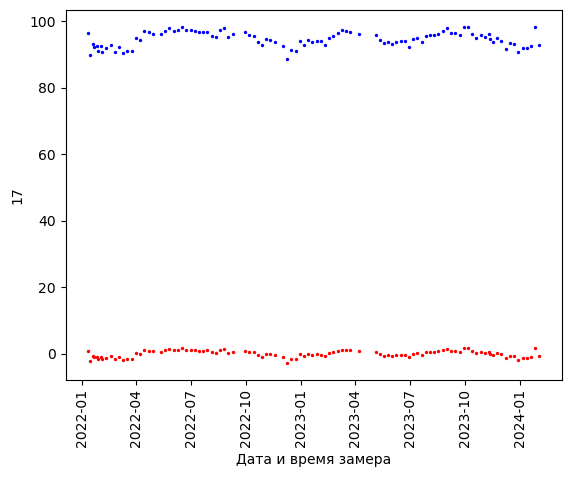

In [138]:
name='17'
Graph(FeaturesMatrix, TimeVector, name, Single=False)
Graph(FeaturesMatrixNormalize, TimeVector, name, color='red')

In [126]:
#Обучение модели с подбором гиперпараметра k
Attempts = 30
MaxNeigh = 10
AverageScore = pd.Series(index=range(1, MaxNeigh))
for k in range(1, MaxNeigh+1):
    ScoreR2 = []
    for i in range(Attempts):
        X_train, X_test, y_train, y_test = train_test_split(FeaturesMatrixNormalize, TargetVectorNormalize, train_size=0.7)
        model = KNeighborsRegressor(n_neighbors=k, weights='distance', metric='euclidean')
        model.fit(X_train, y_train)
        y_predicted = pd.DataFrame(model.predict(X_test), index=X_test.index, columns=['0'])
        ScoreR2.append(r2_score(y_test, y_predicted))
    AverageScore[k] = sum(ScoreR2)/Attempts
    print(k, AverageScore[k])
BestScore = AverageScore.max()
BestK = AverageScore.idxmax()
print(BestK, BestScore)



1 0.831103339290744
2 0.8358010887674558
3 0.8329477865208935
4 0.8281716468702008
5 0.8126901373286596
6 0.7929367635604782
7 0.8048870624836305
8 0.7890868421288378
9 0.7950476149704645
10 0.7871883683048467
2 0.8358010887674558


In [134]:
#Конечная модель
X_train, X_test, y_train, y_test = train_test_split(FeaturesMatrixNormalize, TargetVectorNormalize, train_size=0.7)
model = KNeighborsRegressor(n_neighbors=BestK, weights='distance', metric='euclidean')
model.fit(X_train, y_train)
y_predicted = pd.DataFrame(model.predict(X_test), index=X_test.index, columns=['0'])
r2_score(y_test, y_predicted)

0.8679663615039513

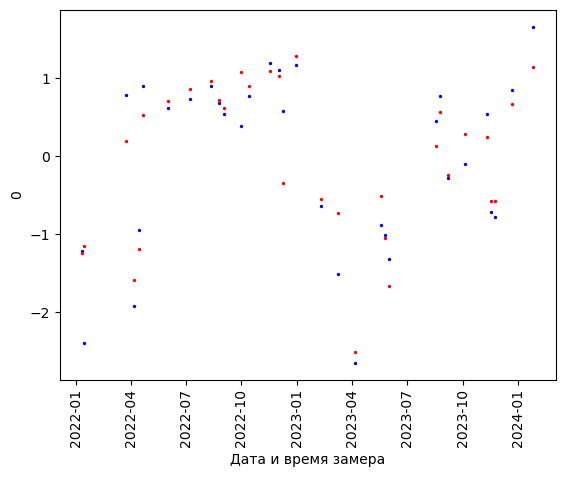

In [135]:
#Вывод предсказаний целевых значений на примере тестовой выборки
Graph(y_test, TimeVector, '0', Single=False)
Graph(y_predicted, TimeVector, '0', color='red')

In [129]:
#Разбиение выборки по каждому 3-му
def Splitter(FeatMat, TargVec, Shift=0):
    TestIndexes = [i for i in TargVec.index if i%3==Shift]
    MatrixTrain = FeatMat.drop(TestIndexes)
    MatrixTest = FeatMat.iloc[TestIndexes]
    VectorTrain = TargVec.drop(TestIndexes)
    VectorTest = TargVec.iloc[TestIndexes]
    return MatrixTrain, MatrixTest, VectorTrain, VectorTest

In [131]:
X_train, X_test, y_train, y_test = Splitter(FeaturesMatrixNormalize, TargetVectorNormalize)
X_test

,1,2,3,4,5,6,7,8,9,10,...,34,35,36,37,38,39,40,41,42,43
0,10.032978,-0.494442,-2.975866,-0.338080,1.102889,0.683244,-2.952646,-0.799030,0.087225,0.314564,...,0.250938,-0.590353,-0.137828,-0.677476,-1.346106,1.191110,-1.267532,0.958281,-0.882984,0.108776
3,0.635706,-0.355968,-3.115905,-0.805340,0.862384,0.219108,-3.007401,-0.799030,0.054566,0.093997,...,0.484800,2.607663,-0.501020,-0.827538,-1.351557,1.279567,-1.150640,1.048689,-0.882984,-1.167677
6,-0.133951,-0.434561,-1.194259,-1.009396,1.295293,0.415114,-1.133991,-0.915717,-0.890223,-0.156786,...,0.484800,-0.386224,-0.532994,0.887461,0.577978,-0.743878,0.169107,1.173210,-0.882984,-1.012282
9,-0.133951,-0.494442,-1.626046,-1.418248,1.391495,0.231896,-1.564211,-1.382466,-0.155387,0.352333,...,0.718662,-1.066653,-1.688979,-0.286242,0.507119,-0.738349,-0.913085,0.991760,-0.882984,-0.834689
12,0.002601,-0.163228,-1.653275,-0.251578,0.694030,0.415655,-1.806698,-1.149092,1.032013,1.092594,...,-0.661124,-0.386224,0.085990,-0.827538,-1.340655,1.406723,-0.766028,-0.038347,-0.882984,-0.490602
15,-0.034641,-0.466373,-0.890841,0.511415,0.970611,1.091290,-0.766349,-0.332281,0.738079,1.051804,...,-1.206803,-0.250139,0.624630,-0.168335,-1.346106,1.473066,0.331248,-0.771680,-0.882984,0.741452
18,-0.133951,-0.494442,-0.688562,0.764268,-0.099638,0.303343,-0.832838,1.067966,-1.151498,-0.842660,...,0.578345,-0.046010,0.718912,0.233618,0.866863,-0.738349,0.497159,-0.430384,1.132523,-0.468403
21,-0.133951,-0.494442,0.256701,0.579434,0.766181,0.956515,0.105823,-0.098906,0.061564,0.541175,...,-1.619959,-0.454267,0.551663,-0.811460,0.736047,-0.732821,-0.558639,-0.903514,1.132523,4.537512
24,-0.133951,-0.494442,1.166955,0.725083,1.379470,1.565778,1.181371,-0.332281,0.021906,0.796489,...,-1.947366,-0.318182,0.535267,-0.355913,-1.340655,1.362495,-0.215505,-0.437397,1.132523,1.074440
27,-0.133951,-0.494442,1.303104,0.603093,1.150990,1.294874,1.333904,-0.448968,0.003244,0.708867,...,0.492595,-0.386224,0.465579,-0.414866,-1.346106,1.274038,-0.385187,-0.333895,1.132523,0.874648
